# Introduction
I am going to make a summary report for the benchmark work having been done, for the truth vcfs (Both synthetic and GIAB) and the predictions. 

# Methods
## Create the work directory and space

In [1]:
!mkdir -p ~/CL/SV/bench_ws
%cd ~/CL/SV/bench_ws


/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws


## Prepare the GIAB data

In [2]:
! mkdir giab
! cp ../mocca-bench/data/HG002_SVs_Tier1_v0.6.vcf.gz* giab
! cp ../mocca-bench/data/HG002_SVs_Tier1_noVDJorXorY_v0.6.2.bed giab


mkdir: cannot create directory `giab': File exists


In [3]:
%cd  giab

/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws/giab


In [4]:
# Test using default refdist of 500 bp (rather than 2000 bp ). Got the same 9,361 
!rm -fr TestvcfvsGIABv0.6
!truvari  -p 0 -b HG002_SVs_Tier1_v0.6.vcf.gz -c HG002_SVs_Tier1_v0.6.vcf.gz -o TestvcfvsGIABv0.6 --passonly --includebed HG002_SVs_Tier1_noVDJorXorY_v0.6.2.bed  --giabreport


usage: truvari [-h] CMD ...
truvari: error: argument CMD: invalid choice: '0' (choose from 'bench', 'consistency', 'anno', 'stats', 'version')


In [5]:
!ls -al TestvcfvsGIABv0.6/ 

ls: cannot access TestvcfvsGIABv0.6/: No such file or directory


In [6]:
! grep -v "^#" TestvcfvsGIABv0.6/tp-call.vcf |wc -l

grep: TestvcfvsGIABv0.6/tp-call.vcf: No such file or directory
0


So far, I got 9,361 SVs from truvari and I got the same count using my own program. 

In [8]:
## Convert tp-base.vcf to bed file
# bedops vcf2bed does not work, it is likely that the line is too long in GIAB vcf file.


In [9]:
# got 9,184 entries using [50,50000]. bug?! 
!~/bin/SURVIVOR vcftobed tp-base.vcf 1 500000000 tp-base.bed



In [10]:
!head tp-base.bed

1	9370130	9370130	1	9370185	9370185	HG4_Ill_Krunchall_133	,	+	-	DEL	1	9370131	1	9370186
1	102123408	102123408	1	102123490	102123490	HG2_Ill_SVrefine2DISCOVARplusDovetail_553	,	+	-	DEL	1	102123409	1	102123491
1	205439853	205439853	1	205440023	205440023	HG2_10X_SVrefine210Xhap12_866	,	+	-	DEL	1	205439854	1	205440024
1	9342495	9342495	1	9342764	9342764	HG2_PB_SVrefine2PB10Xhap12_167	,	+	-	INS	1	9342496	1	9342765
1	93810432	93810432	1	93810547	93810547	HG2_Ill_GATKHCSBGrefine_389	,	+	-	INS	1	93810433	1	93810548
1	30774223	30774223	1	30774282	30774282	HG2_PB_SVrefine2PB10Xhap12_293	,	+	-	INS	1	30774224	1	30774283
1	218785911	218785911	1	218786232	218786232	HG2_10X_allpass_181	,	+	-	DEL	1	218785912	1	218786233
1	30298150	30298150	1	30298203	30298203	HG3_Ill_GATKHCSBGrefine_174	,	+	-	DEL	1	30298151	1	30298204
1	30346045	30346045	1	30346436	30346436	HG3_Ill_MetaSV_71	,	+	-	INS	1	30346046	1	30346437
1	23821720	23821720	1	23821785	23821785	HG4_Ill_150bpfermikitraw_259	,	+	-	INS	1	23821721	1	2382

In [11]:
# Not quite understand the first 6 columns of the output
!awk -v OFS='\t' '{print $12,$13,$15,$7,$8,$9,$10,$11,$12,$13,$14,$15}' tp-base.bed > giab_truth.bed
!head giab_truth.bed

1	9370131	9370186	HG4_Ill_Krunchall_133	,	+	-	DEL	1	9370131	1	9370186
1	102123409	102123491	HG2_Ill_SVrefine2DISCOVARplusDovetail_553	,	+	-	DEL	1	102123409	1	102123491
1	205439854	205440024	HG2_10X_SVrefine210Xhap12_866	,	+	-	DEL	1	205439854	1	205440024
1	9342496	9342765	HG2_PB_SVrefine2PB10Xhap12_167	,	+	-	INS	1	9342496	1	9342765
1	93810433	93810548	HG2_Ill_GATKHCSBGrefine_389	,	+	-	INS	1	93810433	1	93810548
1	30774224	30774283	HG2_PB_SVrefine2PB10Xhap12_293	,	+	-	INS	1	30774224	1	30774283
1	218785912	218786233	HG2_10X_allpass_181	,	+	-	DEL	1	218785912	1	218786233
1	30298151	30298204	HG3_Ill_GATKHCSBGrefine_174	,	+	-	DEL	1	30298151	1	30298204
1	30346046	30346437	HG3_Ill_MetaSV_71	,	+	-	INS	1	30346046	1	30346437
1	23821721	23821786	HG4_Ill_150bpfermikitraw_259	,	+	-	INS	1	23821721	1	23821786


In [12]:
## Process the Synthetic data and focus on IS1 
!mkdir -p ../synthetic
%cd ../synthetic

/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws/synthetic


In [13]:
!cp ../../mocca-bench/data/dreamsmc.IS1.updateSV.truth.vcf.gz .

In [14]:
# convert it to bed and need to ignore <IGN> and <MSK>
!zcat ../../mocca-bench/data/dreamsmc.IS1.updateSV.truth.vcf.gz > is1.vcf
!~/bin/SURVIVOR vcftobed is1.vcf 0 10000000000 tmp.bed
!grep -v  "^#" is1.vcf | grep -v -e "MSK" -e "IGN" | grep -c SVTYPE

# add UID in the 4th column 
! awk -v OFS='\t' '{if($11 != "NA") print $12,$13,$15,"UID_"NR,$8,$9,$10,$11,$12,$13,$14,$15}' tmp.bed > is1_truth.bed
!wc -l is1_truth.bed

!head is1_truth.bed


371
371 is1_truth.bed
1	25204182	25210854	UID_3	,	-	+	DUP	1	25204182	1	25210854
1	32176186	32193834	UID_5	,	+	+	INV	1	32176186	1	32193834
1	36419037	36421454	UID_7	,	+	-	DEL	1	36419037	1	36421454
1	37852934	37863686	UID_9	,	+	+	INV	1	37852934	1	37863686
1	40302119	40310286	UID_11	,	+	-	DEL	1	40302119	1	40310286
1	52748187	52752298	UID_13	,	+	-	DEL	1	52748187	1	52752298
1	62421145	62424426	UID_15	,	+	-	DEL	1	62421145	1	62424426
1	67068898	67075815	UID_17	,	+	+	INV	1	67068898	1	67075815
1	67694632	67698300	UID_19	,	-	+	DUP	1	67694632	1	67698300
1	70709636	70717682	UID_21	,	-	+	DUP	1	70709636	1	70717682


In [15]:
%cd ~/CL/SV/bench_ws

/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws


In [16]:
mkdir 

mkdir: missing operand
Try `mkdir --help' for more information.


## Summary of truth SVs 

In [18]:
import pandas as pd
giab_truth = pd.read_csv("giab/giab_truth.bed", sep="\t", header=None)


In [19]:
giab_truth.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,9370131,9370186,HG4_Ill_Krunchall_133,",",+,-,DEL,1,9370131,1,9370186
1,1,102123409,102123491,HG2_Ill_SVrefine2DISCOVARplusDovetail_553,",",+,-,DEL,1,102123409,1,102123491
2,1,205439854,205440024,HG2_10X_SVrefine210Xhap12_866,",",+,-,DEL,1,205439854,1,205440024
3,1,9342496,9342765,HG2_PB_SVrefine2PB10Xhap12_167,",",+,-,INS,1,9342496,1,9342765
4,1,93810433,93810548,HG2_Ill_GATKHCSBGrefine_389,",",+,-,INS,1,93810433,1,93810548


In [20]:
giab_truth[9]



0         9370131
1       102123409
2       205439854
3         9342496
4        93810433
          ...    
9356     17863743
9357     17889021
9358     19210894
9359     45002747
9360     25832627
Name: 9, Length: 9361, dtype: int64

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

giab_truth["len"] = giab_truth[11]-giab_truth[9]
giab_truth.head()



,0,1,2,3,4,5,6,7,8,9,10,11,len
0,1,9370131,9370186,HG4_Ill_Krunchall_133,",",+,-,DEL,1,9370131,1,9370186,55
1,1,102123409,102123491,HG2_Ill_SVrefine2DISCOVARplusDovetail_553,",",+,-,DEL,1,102123409,1,102123491,82
2,1,205439854,205440024,HG2_10X_SVrefine210Xhap12_866,",",+,-,DEL,1,205439854,1,205440024,170
3,1,9342496,9342765,HG2_PB_SVrefine2PB10Xhap12_167,",",+,-,INS,1,9342496,1,9342765,269
4,1,93810433,93810548,HG2_Ill_GATKHCSBGrefine_389,",",+,-,INS,1,93810433,1,93810548,115


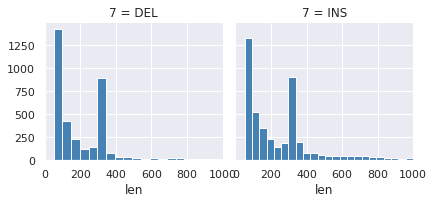

In [22]:
g = sns.FacetGrid(giab_truth,  col=7, margin_titles=True)

g = g.map(plt.hist, "len", color="steelblue", bins=1000)
g.set(xlim=(0,1000))
# for ax in g.axes.flatten():
#     ax.set_xscale('log')


In [23]:
is1_truth=pd.read_csv("synthetic/is1_truth.bed", sep="\t", header=None)
is1_truth.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1,25204182,25210854,UID_3,",",-,+,DUP,1,25204182,1,25210854
1,1,32176186,32193834,UID_5,",",+,+,INV,1,32176186,1,32193834
2,1,36419037,36421454,UID_7,",",+,-,DEL,1,36419037,1,36421454
3,1,37852934,37863686,UID_9,",",+,+,INV,1,37852934,1,37863686
4,1,40302119,40310286,UID_11,",",+,-,DEL,1,40302119,1,40310286


In [25]:
# g = sns.FacetGrid(is1_truth,  col=7, margin_titles=True)

# g = g.map(plt.hist, "len", color="steelblue", bins=1000)
# g.set(xlim=(0,1000))

It is clear that the bed file converted by SURVIVOR vcftobed is problematic for the GIAB SV file:
+ The first 6 columns as mentioned above
+ SV length is one more than it should be.
+ The end of INS should be 1+ the start position. 

I am going to test a new way to convert VCF to the bed file. 

In [26]:
!ls -al ../mocca-bench/src/*.bed

-rw-rw-r-- 1 zhuw10 root  340969 Jun 25 22:22 ../mocca-bench/src/foo.bed
-rw-rw-r-- 1 zhuw10 root 3050428 Jun 25 21:09 ../mocca-bench/src/giab.bed
-rw-rw-r-- 1 zhuw10 root 1047657 Jun 25 22:20 ../mocca-bench/src/giab_flt2.bed
-rw-rw-r-- 1 zhuw10 root 1307967 Jun 25 22:19 ../mocca-bench/src/giab_flt.bed
-rw-rw-r-- 1 zhuw10 root 3050428 Jun 25 21:14 ../mocca-bench/src/giab_good.bed
-rw-rw-r-- 1 zhuw10 root  769370 Jun 25 22:20 ../mocca-bench/src/giab_v6.bed
-rw-rw-r-- 1 zhuw10 root  112986 Jun 25 20:12 ../mocca-bench/src/manta_germline.bed
-rw-rw-r-- 1 zhuw10 root   14408 Jun 27 16:28 ../mocca-bench/src/my_is1.bed
-rw-rw-r-- 1 zhuw10 root  545236 Jun 26 21:57 ../mocca-bench/src/my-tp-base.bed


In [27]:
%cd /mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws

/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws


In [28]:
from pybedtools import BedTool
giab_sv=BedTool("../mocca-bench/src/my-tp-base.bed")
len(giab_sv)

9361

In [29]:
giab_sv.head(n=5)

1	9370131	9370186	HG4_Ill_Krunchall_133	DEL	54
 1	102123409	102123491	HG2_Ill_SVrefine2DISCOVARplusDovetail_553	DEL	81
 1	205439854	205440024	HG2_10X_SVrefine210Xhap12_866	DEL	169
 1	9342496	9342497	HG2_PB_SVrefine2PB10Xhap12_167	INS	268
 1	93810433	93810434	HG2_Ill_GATKHCSBGrefine_389	INS	114
 

In [30]:
f=giab_sv[0]
print(f)
print(f.start, f.stop, f.chrom)
print(f.__dir__())
print(f.fields)
print(f.attrs)
print(f.name)
type(f)

1	9370131	9370186	HG4_Ill_Krunchall_133	DEL	54

9370131 9370186 1
['__repr__', '__hash__', '__str__', '__lt__', '__le__', '__eq__', '__ne__', '__gt__', '__ge__', '__init__', '__bool__', '__len__', '__getitem__', '__setitem__', '__delitem__', '__new__', '__copy__', 'deparse_attrs', 'append', 'chrom', 'start', 'end', 'stop', 'strand', 'length', 'fields', 'attrs', 'count', 'name', 'score', 'file_type', 'o_start', 'o_end', 'o_amt', '__doc__', '__pyx_vtable__', '__reduce__', '__setstate__', '__getattribute__', '__setattr__', '__delattr__', '__reduce_ex__', '__subclasshook__', '__init_subclass__', '__format__', '__sizeof__', '__dir__', '__class__']
['1', '9370131', '9370186', 'HG4_Ill_Krunchall_133', 'DEL', '54']
;
HG4_Ill_Krunchall_133


pybedtools.cbedtools.Interval

In [31]:
!module load bedtools
!which slopBed

/home/zhuw10/miniconda3/bin/slopBed


In [34]:
#prepare the genome size file
import pybedtools
pybedtools.chromsizes_to_file(pybedtools.chromsizes('hg19'), 'hg19.genome')

'hg19.genome'

In [35]:
# convert to b37
!sed -e 's/^chr//' hg19.genome |grep -v -e  Un -e _ > b37.genome


In [36]:
!pwd
%cd /mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws

/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws
/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws


In [37]:
import gc
gc.collect()

148

In [39]:
%cd /mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws
# expand the prediction by 500 bp and check the overlap with the truth
import pybedtools
from pybedtools import BedTool

#hg19 = pybedtools.helpers.chromsizes('GRCh37')
comp_bed = BedTool("../mocca-bench/src/manta_germline.bed")
# add id to comp_bed

comp_bed[0].name
print(dir(comp_bed[0]))
#print(comp_bed[0].__dict__)

/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws
['__bool__', '__class__', '__copy__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__pyx_vtable__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'attrs', 'chrom', 'count', 'deparse_attrs', 'end', 'fields', 'file_type', 'length', 'name', 'o_amt', 'o_end', 'o_start', 'score', 'start', 'stop', 'strand']


In [40]:
%cd /mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws
import pandas as pd

df = pd.read_csv("../mocca-bench/src/manta_germline.bed", header=None, sep="\t")

/mnt/nfs/gigantor/ifs/DCEG/Projects/CoherentLogic/SV/bench_ws


In [41]:
df.head()

,0,1,2
0,1,1501010,1501107
1,1,1501063,1501064
2,1,1530500,1530850
3,1,1598413,1598580
4,1,1866335,1866537


In [43]:
# convert df to a list of tuple with name
#import os
x=list()
for index, row in df.iterrows(): 
    print(type(row))
    
    z = row.tolist()
    z2=z.append("UID_"+str(index))
    print(z2)
    print("z: ", z)
    #os.exit()
    entry = tuple(z)
    x.append(entry)

x.head()

<class 'pandas.core.series.Series'>
None
z:  [1, 1501010, 1501107, 'UID_0']
<class 'pandas.core.series.Series'>
None
z:  [1, 1501063, 1501064, 'UID_1']
<class 'pandas.core.series.Series'>
None
z:  [1, 1530500, 1530850, 'UID_2']
<class 'pandas.core.series.Series'>
None
z:  [1, 1598413, 1598580, 'UID_3']
<class 'pandas.core.series.Series'>
None
z:  [1, 1866335, 1866537, 'UID_4']
<class 'pandas.core.series.Series'>
None
z:  [1, 1866628, 1867023, 'UID_5']
<class 'pandas.core.series.Series'>
None
z:  [1, 1880373, 1880374, 'UID_6']
<class 'pandas.core.series.Series'>
None
z:  [1, 1925143, 1925144, 'UID_7']
<class 'pandas.core.series.Series'>
None
z:  [1, 2143168, 2143626, 'UID_8']
<class 'pandas.core.series.Series'>
None
z:  [1, 2280150, 2280240, 'UID_9']
<class 'pandas.core.series.Series'>
None
z:  [1, 3092626, 3092849, 'UID_10']
<class 'pandas.core.series.Series'>
None
z:  [1, 3598418, 3598491, 'UID_11']
<class 'pandas.core.series.Series'>
None
z:  [1, 3714245, 3714246, 'UID_12']
<class 'p

<class 'pandas.core.series.Series'>
None
z:  [1, 82963291, 82963615, 'UID_161']
<class 'pandas.core.series.Series'>
None
z:  [1, 83125958, 83127569, 'UID_162']
<class 'pandas.core.series.Series'>
None
z:  [1, 83149850, 83149910, 'UID_163']
<class 'pandas.core.series.Series'>
None
z:  [1, 84517925, 84524629, 'UID_164']
<class 'pandas.core.series.Series'>
None
z:  [1, 85748620, 85748950, 'UID_165']
<class 'pandas.core.series.Series'>
None
z:  [1, 86740980, 86741697, 'UID_166']
<class 'pandas.core.series.Series'>
None
z:  [1, 88860717, 88860718, 'UID_167']
<class 'pandas.core.series.Series'>
None
z:  [1, 88923362, 88923363, 'UID_168']
<class 'pandas.core.series.Series'>
None
z:  [1, 89475908, 89478624, 'UID_169']
<class 'pandas.core.series.Series'>
None
z:  [1, 91624771, 91625054, 'UID_170']
<class 'pandas.core.series.Series'>
None
z:  [1, 91924853, 91924854, 'UID_171']
<class 'pandas.core.series.Series'>
None
z:  [1, 92232061, 92233333, 'UID_172']
<class 'pandas.core.series.Series'>
None

<class 'pandas.core.series.Series'>
None
z:  [1, 220285454, 220285774, 'UID_340']
<class 'pandas.core.series.Series'>
None
z:  [1, 220502943, 220503582, 'UID_341']
<class 'pandas.core.series.Series'>
None
z:  [1, 221969155, 221969156, 'UID_342']
<class 'pandas.core.series.Series'>
None
z:  [1, 222034143, 222034475, 'UID_343']
<class 'pandas.core.series.Series'>
None
z:  [1, 222263514, 222263522, 'UID_344']
<class 'pandas.core.series.Series'>
None
z:  [1, 222263518, 222263519, 'UID_345']
<class 'pandas.core.series.Series'>
None
z:  [1, 223142712, 223142713, 'UID_346']
<class 'pandas.core.series.Series'>
None
z:  [1, 223204699, 223204778, 'UID_347']
<class 'pandas.core.series.Series'>
None
z:  [1, 223254530, 223254531, 'UID_348']
<class 'pandas.core.series.Series'>
None
z:  [1, 224247102, 224247578, 'UID_349']
<class 'pandas.core.series.Series'>
None
z:  [1, 224392821, 224393134, 'UID_350']
<class 'pandas.core.series.Series'>
None
z:  [1, 224464641, 224464705, 'UID_351']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [2, 41973141, 41975865, 'UID_527']
<class 'pandas.core.series.Series'>
None
z:  [2, 42346259, 42347318, 'UID_528']
<class 'pandas.core.series.Series'>
None
z:  [2, 43410716, 43410718, 'UID_529']
<class 'pandas.core.series.Series'>
None
z:  [2, 44636234, 44636322, 'UID_530']
<class 'pandas.core.series.Series'>
None
z:  [2, 44783587, 44783908, 'UID_531']
<class 'pandas.core.series.Series'>
None
z:  [2, 45338980, 45338981, 'UID_532']
<class 'pandas.core.series.Series'>
None
z:  [2, 45448408, 45448841, 'UID_533']
<class 'pandas.core.series.Series'>
None
z:  [2, 46433782, 46433944, 'UID_534']
<class 'pandas.core.series.Series'>
None
z:  [2, 46905010, 46905060, 'UID_535']
<class 'pandas.core.series.Series'>
None
z:  [2, 46910132, 46910448, 'UID_536']
<class 'pandas.core.series.Series'>
None
z:  [2, 47119859, 47119860, 'UID_537']
<class 'pandas.core.series.Series'>
None
z:  [2, 47319280, 47319281, 'UID_538']
<class 'pandas.core.series.Series'>
None

<class 'pandas.core.series.Series'>
None
z:  [2, 176102663, 176102716, 'UID_716']
<class 'pandas.core.series.Series'>
None
z:  [2, 177265641, 177272040, 'UID_717']
<class 'pandas.core.series.Series'>
None
z:  [2, 178351454, 178351455, 'UID_718']
<class 'pandas.core.series.Series'>
None
z:  [2, 178855455, 178857212, 'UID_719']
<class 'pandas.core.series.Series'>
None
z:  [2, 179296981, 179300871, 'UID_720']
<class 'pandas.core.series.Series'>
None
z:  [2, 179301046, 179306336, 'UID_721']
<class 'pandas.core.series.Series'>
None
z:  [2, 179312311, 179314966, 'UID_722']
<class 'pandas.core.series.Series'>
None
z:  [2, 179315138, 179315692, 'UID_723']
<class 'pandas.core.series.Series'>
None
z:  [2, 179306430, 179307992, 'UID_724']
<class 'pandas.core.series.Series'>
None
z:  [2, 179621866, 179621954, 'UID_725']
<class 'pandas.core.series.Series'>
None
z:  [2, 180422250, 180422336, 'UID_726']
<class 'pandas.core.series.Series'>
None
z:  [2, 181738260, 181738261, 'UID_727']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [3, 28397380, 28406760, 'UID_906']
<class 'pandas.core.series.Series'>
None
z:  [3, 31856630, 31856688, 'UID_907']
<class 'pandas.core.series.Series'>
None
z:  [3, 32102050, 32107883, 'UID_908']
<class 'pandas.core.series.Series'>
None
z:  [3, 32153718, 32153875, 'UID_909']
<class 'pandas.core.series.Series'>
None
z:  [3, 32203861, 32204143, 'UID_910']
<class 'pandas.core.series.Series'>
None
z:  [3, 32420587, 32420740, 'UID_911']
<class 'pandas.core.series.Series'>
None
z:  [3, 32806746, 32808061, 'UID_912']
<class 'pandas.core.series.Series'>
None
z:  [3, 32940758, 32940854, 'UID_913']
<class 'pandas.core.series.Series'>
None
z:  [3, 33085263, 33085264, 'UID_914']
<class 'pandas.core.series.Series'>
None
z:  [3, 33085263, 33085294, 'UID_915']
<class 'pandas.core.series.Series'>
None
z:  [3, 33553189, 33554075, 'UID_916']
<class 'pandas.core.series.Series'>
None
z:  [3, 34859777, 34859778, 'UID_917']
<class 'pandas.core.series.Series'>
None

<class 'pandas.core.series.Series'>
None
z:  [3, 148566792, 148567110, 'UID_1096']
<class 'pandas.core.series.Series'>
None
z:  [3, 148844372, 148844700, 'UID_1097']
<class 'pandas.core.series.Series'>
None
z:  [3, 149593684, 149593685, 'UID_1098']
<class 'pandas.core.series.Series'>
None
z:  [3, 149853189, 149853190, 'UID_1099']
<class 'pandas.core.series.Series'>
None
z:  [3, 149878065, 149878375, 'UID_1100']
<class 'pandas.core.series.Series'>
None
z:  [3, 149962933, 149962949, 'UID_1101']
<class 'pandas.core.series.Series'>
None
z:  [3, 151086421, 151086487, 'UID_1102']
<class 'pandas.core.series.Series'>
None
z:  [3, 151275815, 151275816, 'UID_1103']
<class 'pandas.core.series.Series'>
None
z:  [3, 152311723, 152313155, 'UID_1104']
<class 'pandas.core.series.Series'>
None
z:  [3, 152611311, 152611312, 'UID_1105']
<class 'pandas.core.series.Series'>
None
z:  [3, 153386325, 153386384, 'UID_1106']
<class 'pandas.core.series.Series'>
None
z:  [3, 154096733, 154097053, 'UID_1107']
<cla

<class 'pandas.core.series.Series'>
None
z:  [4, 37739598, 37739650, 'UID_1286']
<class 'pandas.core.series.Series'>
None
z:  [4, 37903308, 37903309, 'UID_1287']
<class 'pandas.core.series.Series'>
None
z:  [4, 38755998, 38755999, 'UID_1288']
<class 'pandas.core.series.Series'>
None
z:  [4, 38881715, 38881773, 'UID_1289']
<class 'pandas.core.series.Series'>
None
z:  [4, 39031076, 39031358, 'UID_1290']
<class 'pandas.core.series.Series'>
None
z:  [4, 40024915, 40026281, 'UID_1291']
<class 'pandas.core.series.Series'>
None
z:  [4, 40754838, 40754839, 'UID_1292']
<class 'pandas.core.series.Series'>
None
z:  [4, 42302196, 42302197, 'UID_1293']
<class 'pandas.core.series.Series'>
None
z:  [4, 42557102, 42557171, 'UID_1294']
<class 'pandas.core.series.Series'>
None
z:  [4, 43345692, 43345693, 'UID_1295']
<class 'pandas.core.series.Series'>
None
z:  [4, 43399986, 43399987, 'UID_1296']
<class 'pandas.core.series.Series'>
None
z:  [4, 43527670, 43527671, 'UID_1297']
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
None
z:  [4, 131611192, 131611360, 'UID_1477']
<class 'pandas.core.series.Series'>
None
z:  [4, 131694838, 131695089, 'UID_1478']
<class 'pandas.core.series.Series'>
None
z:  [4, 133114039, 133114358, 'UID_1479']
<class 'pandas.core.series.Series'>
None
z:  [4, 133619876, 133620182, 'UID_1480']
<class 'pandas.core.series.Series'>
None
z:  [4, 133819597, 133819920, 'UID_1481']
<class 'pandas.core.series.Series'>
None
z:  [4, 133823804, 133823805, 'UID_1482']
<class 'pandas.core.series.Series'>
None
z:  [4, 134141602, 134141911, 'UID_1483']
<class 'pandas.core.series.Series'>
None
z:  [4, 134346775, 134346898, 'UID_1484']
<class 'pandas.core.series.Series'>
None
z:  [4, 135130266, 135130267, 'UID_1485']
<class 'pandas.core.series.Series'>
None
z:  [4, 135135335, 135135336, 'UID_1486']
<class 'pandas.core.series.Series'>
None
z:  [4, 135566117, 135566238, 'UID_1487']
<class 'pandas.core.series.Series'>
None
z:  [4, 135566171, 135566268, 'UID_1488']
<cla

z:  [5, 9400610, 9400880, 'UID_1667']
<class 'pandas.core.series.Series'>
None
z:  [5, 9411760, 9412074, 'UID_1668']
<class 'pandas.core.series.Series'>
None
z:  [5, 9990098, 9990311, 'UID_1669']
<class 'pandas.core.series.Series'>
None
z:  [5, 10005278, 10005582, 'UID_1670']
<class 'pandas.core.series.Series'>
None
z:  [5, 10455894, 10455895, 'UID_1671']
<class 'pandas.core.series.Series'>
None
z:  [5, 10455894, 10455950, 'UID_1672']
<class 'pandas.core.series.Series'>
None
z:  [5, 10984648, 10984649, 'UID_1673']
<class 'pandas.core.series.Series'>
None
z:  [5, 11285981, 11285982, 'UID_1674']
<class 'pandas.core.series.Series'>
None
z:  [5, 11285981, 11286054, 'UID_1675']
<class 'pandas.core.series.Series'>
None
z:  [5, 11339025, 11339349, 'UID_1676']
<class 'pandas.core.series.Series'>
None
z:  [5, 11641855, 11641913, 'UID_1677']
<class 'pandas.core.series.Series'>
None
z:  [5, 12037489, 12037569, 'UID_1678']
<class 'pandas.core.series.Series'>
None
z:  [5, 12685942, 12685943, 'UID_1

None
z:  [5, 114325356, 114334992, 'UID_1859']
<class 'pandas.core.series.Series'>
None
z:  [5, 114393663, 114393930, 'UID_1860']
<class 'pandas.core.series.Series'>
None
z:  [5, 114522075, 114522078, 'UID_1861']
<class 'pandas.core.series.Series'>
None
z:  [5, 114731312, 114731630, 'UID_1862']
<class 'pandas.core.series.Series'>
None
z:  [5, 114739722, 114739723, 'UID_1863']
<class 'pandas.core.series.Series'>
None
z:  [5, 114756498, 114757889, 'UID_1864']
<class 'pandas.core.series.Series'>
None
z:  [5, 114969336, 114969811, 'UID_1865']
<class 'pandas.core.series.Series'>
None
z:  [5, 114990577, 114990650, 'UID_1866']
<class 'pandas.core.series.Series'>
None
z:  [5, 115130457, 115130806, 'UID_1867']
<class 'pandas.core.series.Series'>
None
z:  [5, 115177803, 115202366, 'UID_1868']
<class 'pandas.core.series.Series'>
None
z:  [5, 115894136, 115894457, 'UID_1869']
<class 'pandas.core.series.Series'>
None
z:  [5, 116273303, 116273388, 'UID_1870']
<class 'pandas.core.series.Series'>
None

<class 'pandas.core.series.Series'>
None
z:  [6, 35754560, 35766785, 'UID_2048']
<class 'pandas.core.series.Series'>
None
z:  [6, 36070119, 36070193, 'UID_2049']
<class 'pandas.core.series.Series'>
None
z:  [6, 36664367, 36664425, 'UID_2050']
<class 'pandas.core.series.Series'>
None
z:  [6, 36980774, 36980775, 'UID_2051']
<class 'pandas.core.series.Series'>
None
z:  [6, 37696101, 37696102, 'UID_2052']
<class 'pandas.core.series.Series'>
None
z:  [6, 38922187, 38922502, 'UID_2053']
<class 'pandas.core.series.Series'>
None
z:  [6, 38932126, 38932127, 'UID_2054']
<class 'pandas.core.series.Series'>
None
z:  [6, 40081671, 40081728, 'UID_2055']
<class 'pandas.core.series.Series'>
None
z:  [6, 40622896, 40622897, 'UID_2056']
<class 'pandas.core.series.Series'>
None
z:  [6, 41404060, 41404383, 'UID_2057']
<class 'pandas.core.series.Series'>
None
z:  [6, 41953350, 41953665, 'UID_2058']
<class 'pandas.core.series.Series'>
None
z:  [6, 42430671, 42431342, 'UID_2059']
<class 'pandas.core.series.S

None
z:  [6, 134268976, 134269724, 'UID_2239']
<class 'pandas.core.series.Series'>
None
z:  [6, 134353543, 134353609, 'UID_2240']
<class 'pandas.core.series.Series'>
None
z:  [6, 134817345, 134817662, 'UID_2241']
<class 'pandas.core.series.Series'>
None
z:  [6, 136235615, 136235925, 'UID_2242']
<class 'pandas.core.series.Series'>
None
z:  [6, 136256069, 136256153, 'UID_2243']
<class 'pandas.core.series.Series'>
None
z:  [6, 136256355, 136256356, 'UID_2244']
<class 'pandas.core.series.Series'>
None
z:  [6, 136582252, 136582401, 'UID_2245']
<class 'pandas.core.series.Series'>
None
z:  [6, 136582615, 136589299, 'UID_2246']
<class 'pandas.core.series.Series'>
None
z:  [6, 136603824, 136610849, 'UID_2247']
<class 'pandas.core.series.Series'>
None
z:  [6, 136880496, 136880551, 'UID_2248']
<class 'pandas.core.series.Series'>
None
z:  [6, 137313693, 137314186, 'UID_2249']
<class 'pandas.core.series.Series'>
None
z:  [6, 137438407, 137438408, 'UID_2250']
<class 'pandas.core.series.Series'>
None

<class 'pandas.core.series.Series'>
None
z:  [7, 36878879, 36878968, 'UID_2429']
<class 'pandas.core.series.Series'>
None
z:  [7, 37370959, 37370963, 'UID_2430']
<class 'pandas.core.series.Series'>
None
z:  [7, 37477277, 37477604, 'UID_2431']
<class 'pandas.core.series.Series'>
None
z:  [7, 37998507, 37998822, 'UID_2432']
<class 'pandas.core.series.Series'>
None
z:  [7, 38111602, 38113145, 'UID_2433']
<class 'pandas.core.series.Series'>
None
z:  [7, 38649919, 38649954, 'UID_2434']
<class 'pandas.core.series.Series'>
None
z:  [7, 39380342, 39380407, 'UID_2435']
<class 'pandas.core.series.Series'>
None
z:  [7, 42549700, 42550022, 'UID_2436']
<class 'pandas.core.series.Series'>
None
z:  [7, 42604622, 42604964, 'UID_2437']
<class 'pandas.core.series.Series'>
None
z:  [7, 42773725, 42773745, 'UID_2438']
<class 'pandas.core.series.Series'>
None
z:  [7, 44368153, 44368154, 'UID_2439']
<class 'pandas.core.series.Series'>
None
z:  [7, 44600172, 44600320, 'UID_2440']
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
None
z:  [7, 138604891, 138604992, 'UID_2621']
<class 'pandas.core.series.Series'>
None
z:  [7, 138742268, 138742585, 'UID_2622']
<class 'pandas.core.series.Series'>
None
z:  [7, 139109587, 139109952, 'UID_2623']
<class 'pandas.core.series.Series'>
None
z:  [7, 139207147, 139207462, 'UID_2624']
<class 'pandas.core.series.Series'>
None
z:  [7, 140608586, 140608803, 'UID_2625']
<class 'pandas.core.series.Series'>
None
z:  [7, 141113863, 141114182, 'UID_2626']
<class 'pandas.core.series.Series'>
None
z:  [7, 141491710, 141491898, 'UID_2627']
<class 'pandas.core.series.Series'>
None
z:  [7, 142521343, 142521435, 'UID_2628']
<class 'pandas.core.series.Series'>
None
z:  [7, 142824842, 142893907, 'UID_2629']
<class 'pandas.core.series.Series'>
None
z:  [7, 145425773, 145425774, 'UID_2630']
<class 'pandas.core.series.Series'>
None
z:  [7, 145469555, 145469630, 'UID_2631']
<class 'pandas.core.series.Series'>
None
z:  [7, 146883956, 146884169, 'UID_2632']
<cla

<class 'pandas.core.series.Series'>
None
z:  [8, 54381526, 54381527, 'UID_2812']
<class 'pandas.core.series.Series'>
None
z:  [8, 54528738, 54528739, 'UID_2813']
<class 'pandas.core.series.Series'>
None
z:  [8, 56401202, 56401518, 'UID_2814']
<class 'pandas.core.series.Series'>
None
z:  [8, 56658598, 56658734, 'UID_2815']
<class 'pandas.core.series.Series'>
None
z:  [8, 56676277, 56676407, 'UID_2816']
<class 'pandas.core.series.Series'>
None
z:  [8, 56679561, 56679663, 'UID_2817']
<class 'pandas.core.series.Series'>
None
z:  [8, 56967316, 56967469, 'UID_2818']
<class 'pandas.core.series.Series'>
None
z:  [8, 57300201, 57300318, 'UID_2819']
<class 'pandas.core.series.Series'>
None
z:  [8, 57531391, 57531445, 'UID_2820']
<class 'pandas.core.series.Series'>
None
z:  [8, 57758299, 57758372, 'UID_2821']
<class 'pandas.core.series.Series'>
None
z:  [8, 57779821, 57779928, 'UID_2822']
<class 'pandas.core.series.Series'>
None
z:  [8, 58295148, 58295149, 'UID_2823']
<class 'pandas.core.series.S

<class 'pandas.core.series.Series'>
None
z:  [8, 144958074, 144958196, 'UID_3002']
<class 'pandas.core.series.Series'>
None
z:  [8, 145091977, 145091981, 'UID_3003']
<class 'pandas.core.series.Series'>
None
z:  [8, 145503113, 145503195, 'UID_3004']
<class 'pandas.core.series.Series'>
None
z:  [8, 145669839, 145669893, 'UID_3005']
<class 'pandas.core.series.Series'>
None
z:  [8, 145894643, 145894644, 'UID_3006']
<class 'pandas.core.series.Series'>
None
z:  [8, 146042931, 146043066, 'UID_3007']
<class 'pandas.core.series.Series'>
None
z:  [8, 146057021, 146057832, 'UID_3008']
<class 'pandas.core.series.Series'>
None
z:  [8, 146192868, 146193174, 'UID_3009']
<class 'pandas.core.series.Series'>
None
z:  [9, 469390, 469570, 'UID_3010']
<class 'pandas.core.series.Series'>
None
z:  [9, 1045133, 1045134, 'UID_3011']
<class 'pandas.core.series.Series'>
None
z:  [9, 1665609, 1665610, 'UID_3012']
<class 'pandas.core.series.Series'>
None
z:  [9, 2298288, 2298289, 'UID_3013']
<class 'pandas.core.se

<class 'pandas.core.series.Series'>
None
z:  [9, 132001378, 132001379, 'UID_3194']
<class 'pandas.core.series.Series'>
None
z:  [9, 132026685, 132028069, 'UID_3195']
<class 'pandas.core.series.Series'>
None
z:  [9, 132195804, 132195805, 'UID_3196']
<class 'pandas.core.series.Series'>
None
z:  [9, 132276934, 132276935, 'UID_3197']
<class 'pandas.core.series.Series'>
None
z:  [9, 132621533, 132621534, 'UID_3198']
<class 'pandas.core.series.Series'>
None
z:  [9, 134245625, 134245626, 'UID_3199']
<class 'pandas.core.series.Series'>
None
z:  [9, 134462232, 134462692, 'UID_3200']
<class 'pandas.core.series.Series'>
None
z:  [9, 134673906, 134673995, 'UID_3201']
<class 'pandas.core.series.Series'>
None
z:  [9, 135296997, 135297073, 'UID_3202']
<class 'pandas.core.series.Series'>
None
z:  [9, 136060715, 136061032, 'UID_3203']
<class 'pandas.core.series.Series'>
None
z:  [9, 136377221, 136377271, 'UID_3204']
<class 'pandas.core.series.Series'>
None
z:  [9, 136379210, 136379552, 'UID_3205']
<cla

<class 'pandas.core.series.Series'>
None
z:  [10, 78346589, 78351577, 'UID_3384']
<class 'pandas.core.series.Series'>
None
z:  [10, 81188158, 81188234, 'UID_3385']
<class 'pandas.core.series.Series'>
None
z:  [10, 81695836, 81695991, 'UID_3386']
<class 'pandas.core.series.Series'>
None
z:  [10, 82670410, 82670411, 'UID_3387']
<class 'pandas.core.series.Series'>
None
z:  [10, 82737737, 82738056, 'UID_3388']
<class 'pandas.core.series.Series'>
None
z:  [10, 82904657, 82904910, 'UID_3389']
<class 'pandas.core.series.Series'>
None
z:  [10, 82972198, 82972199, 'UID_3390']
<class 'pandas.core.series.Series'>
None
z:  [10, 84237972, 84238465, 'UID_3391']
<class 'pandas.core.series.Series'>
None
z:  [10, 84400756, 84400905, 'UID_3392']
<class 'pandas.core.series.Series'>
None
z:  [10, 85375925, 85376144, 'UID_3393']
<class 'pandas.core.series.Series'>
None
z:  [10, 85522715, 85523905, 'UID_3394']
<class 'pandas.core.series.Series'>
None
z:  [10, 85626222, 85626430, 'UID_3395']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [11, 41308137, 41308215, 'UID_3576']
<class 'pandas.core.series.Series'>
None
z:  [11, 41363517, 41363735, 'UID_3577']
<class 'pandas.core.series.Series'>
None
z:  [11, 41818196, 41819022, 'UID_3578']
<class 'pandas.core.series.Series'>
None
z:  [11, 41822280, 41822607, 'UID_3579']
<class 'pandas.core.series.Series'>
None
z:  [11, 42156149, 42156478, 'UID_3580']
<class 'pandas.core.series.Series'>
None
z:  [11, 42464098, 42464409, 'UID_3581']
<class 'pandas.core.series.Series'>
None
z:  [11, 42743178, 42743185, 'UID_3582']
<class 'pandas.core.series.Series'>
None
z:  [11, 42838553, 42838607, 'UID_3583']
<class 'pandas.core.series.Series'>
None
z:  [11, 42851063, 42851067, 'UID_3584']
<class 'pandas.core.series.Series'>
None
z:  [11, 42981477, 42981478, 'UID_3585']
<class 'pandas.core.series.Series'>
None
z:  [11, 43891829, 43892165, 'UID_3586']
<class 'pandas.core.series.Series'>
None
z:  [11, 43909593, 43909899, 'UID_3587']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [12, 11341898, 11342212, 'UID_3767']
<class 'pandas.core.series.Series'>
None
z:  [12, 12200992, 12200993, 'UID_3768']
<class 'pandas.core.series.Series'>
None
z:  [12, 12263338, 12263671, 'UID_3769']
<class 'pandas.core.series.Series'>
None
z:  [12, 12930579, 12930657, 'UID_3770']
<class 'pandas.core.series.Series'>
None
z:  [12, 13017634, 13017948, 'UID_3771']
<class 'pandas.core.series.Series'>
None
z:  [12, 13164369, 13164852, 'UID_3772']
<class 'pandas.core.series.Series'>
None
z:  [12, 13199068, 13199172, 'UID_3773']
<class 'pandas.core.series.Series'>
None
z:  [12, 15666018, 15666096, 'UID_3774']
<class 'pandas.core.series.Series'>
None
z:  [12, 16232273, 16232274, 'UID_3775']
<class 'pandas.core.series.Series'>
None
z:  [12, 16420123, 16421283, 'UID_3776']
<class 'pandas.core.series.Series'>
None
z:  [12, 17444825, 17445937, 'UID_3777']
<class 'pandas.core.series.Series'>
None
z:  [12, 17827816, 17827817, 'UID_3778']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [12, 127947266, 127947318, 'UID_3959']
<class 'pandas.core.series.Series'>
None
z:  [12, 128037977, 128038294, 'UID_3960']
<class 'pandas.core.series.Series'>
None
z:  [12, 128391060, 128391944, 'UID_3961']
<class 'pandas.core.series.Series'>
None
z:  [12, 128391065, 128391066, 'UID_3962']
<class 'pandas.core.series.Series'>
None
z:  [12, 128391065, 128391830, 'UID_3963']
<class 'pandas.core.series.Series'>
None
z:  [12, 128425046, 128425049, 'UID_3964']
<class 'pandas.core.series.Series'>
None
z:  [12, 128869779, 128869780, 'UID_3965']
<class 'pandas.core.series.Series'>
None
z:  [12, 128932242, 128932541, 'UID_3966']
<class 'pandas.core.series.Series'>
None
z:  [12, 129519425, 129519426, 'UID_3967']
<class 'pandas.core.series.Series'>
None
z:  [12, 129519425, 129519488, 'UID_3968']
<class 'pandas.core.series.Series'>
None
z:  [12, 129650847, 129650848, 'UID_3969']
<class 'pandas.core.series.Series'>
None
z:  [12, 129840688, 129841001, 'UID

<class 'pandas.core.series.Series'>
None
z:  [13, 90321198, 90321199, 'UID_4150']
<class 'pandas.core.series.Series'>
None
z:  [13, 90365273, 90365274, 'UID_4151']
<class 'pandas.core.series.Series'>
None
z:  [13, 90421367, 90421520, 'UID_4152']
<class 'pandas.core.series.Series'>
None
z:  [13, 90674184, 90674235, 'UID_4153']
<class 'pandas.core.series.Series'>
None
z:  [13, 90903261, 90903262, 'UID_4154']
<class 'pandas.core.series.Series'>
None
z:  [13, 90943356, 90943357, 'UID_4155']
<class 'pandas.core.series.Series'>
None
z:  [13, 91160038, 91160287, 'UID_4156']
<class 'pandas.core.series.Series'>
None
z:  [13, 91597321, 91597325, 'UID_4157']
<class 'pandas.core.series.Series'>
None
z:  [13, 92279248, 92279583, 'UID_4158']
<class 'pandas.core.series.Series'>
None
z:  [13, 92892086, 92892087, 'UID_4159']
<class 'pandas.core.series.Series'>
None
z:  [13, 92892086, 92892143, 'UID_4160']
<class 'pandas.core.series.Series'>
None
z:  [13, 93375606, 93375607, 'UID_4161']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [14, 92101080, 92101092, 'UID_4340']
<class 'pandas.core.series.Series'>
None
z:  [14, 92954762, 92954915, 'UID_4341']
<class 'pandas.core.series.Series'>
None
z:  [14, 93824178, 93824272, 'UID_4342']
<class 'pandas.core.series.Series'>
None
z:  [14, 93926201, 93926506, 'UID_4343']
<class 'pandas.core.series.Series'>
None
z:  [14, 94235337, 94235393, 'UID_4344']
<class 'pandas.core.series.Series'>
None
z:  [14, 94267447, 94267503, 'UID_4345']
<class 'pandas.core.series.Series'>
None
z:  [14, 94638738, 94639875, 'UID_4346']
<class 'pandas.core.series.Series'>
None
z:  [14, 94830249, 94844968, 'UID_4347']
<class 'pandas.core.series.Series'>
None
z:  [14, 95363363, 95363437, 'UID_4348']
<class 'pandas.core.series.Series'>
None
z:  [14, 95363387, 95363388, 'UID_4349']
<class 'pandas.core.series.Series'>
None
z:  [14, 96394033, 96394231, 'UID_4350']
<class 'pandas.core.series.Series'>
None
z:  [14, 98783980, 98785087, 'UID_4351']
<class 'pandas.c

None
z:  [16, 22845998, 22845999, 'UID_4531']
<class 'pandas.core.series.Series'>
None
z:  [16, 22908973, 22909251, 'UID_4532']
<class 'pandas.core.series.Series'>
None
z:  [16, 23047775, 23049531, 'UID_4533']
<class 'pandas.core.series.Series'>
None
z:  [16, 23528535, 23528848, 'UID_4534']
<class 'pandas.core.series.Series'>
None
z:  [16, 23910886, 23911192, 'UID_4535']
<class 'pandas.core.series.Series'>
None
z:  [16, 24347963, 24347980, 'UID_4536']
<class 'pandas.core.series.Series'>
None
z:  [16, 25066650, 25137796, 'UID_4537']
<class 'pandas.core.series.Series'>
None
z:  [16, 25340109, 25343127, 'UID_4538']
<class 'pandas.core.series.Series'>
None
z:  [16, 25623554, 25623861, 'UID_4539']
<class 'pandas.core.series.Series'>
None
z:  [16, 25721774, 25721829, 'UID_4540']
<class 'pandas.core.series.Series'>
None
z:  [16, 26383399, 26383732, 'UID_4541']
<class 'pandas.core.series.Series'>
None
z:  [16, 26385371, 26386267, 'UID_4542']
<class 'pandas.core.series.Series'>
None
z:  [16, 26

<class 'pandas.core.series.Series'>
None
z:  [17, 60934361, 60934485, 'UID_4723']
<class 'pandas.core.series.Series'>
None
z:  [17, 63272053, 63272372, 'UID_4724']
<class 'pandas.core.series.Series'>
None
z:  [17, 65520854, 65521184, 'UID_4725']
<class 'pandas.core.series.Series'>
None
z:  [17, 65727354, 65727630, 'UID_4726']
<class 'pandas.core.series.Series'>
None
z:  [17, 66031566, 66031623, 'UID_4727']
<class 'pandas.core.series.Series'>
None
z:  [17, 66427904, 66427905, 'UID_4728']
<class 'pandas.core.series.Series'>
None
z:  [17, 66955038, 66955092, 'UID_4729']
<class 'pandas.core.series.Series'>
None
z:  [17, 66960926, 66961259, 'UID_4730']
<class 'pandas.core.series.Series'>
None
z:  [17, 68219714, 68219823, 'UID_4731']
<class 'pandas.core.series.Series'>
None
z:  [17, 68455086, 68461176, 'UID_4732']
<class 'pandas.core.series.Series'>
None
z:  [17, 68920206, 68920270, 'UID_4733']
<class 'pandas.core.series.Series'>
None
z:  [17, 69852139, 69852466, 'UID_4734']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [18, 74769770, 74770071, 'UID_4915']
<class 'pandas.core.series.Series'>
None
z:  [18, 74794688, 74794689, 'UID_4916']
<class 'pandas.core.series.Series'>
None
z:  [18, 75883624, 75883625, 'UID_4917']
<class 'pandas.core.series.Series'>
None
z:  [18, 75883624, 75883722, 'UID_4918']
<class 'pandas.core.series.Series'>
None
z:  [18, 75890961, 75891041, 'UID_4919']
<class 'pandas.core.series.Series'>
None
z:  [18, 75891001, 75891002, 'UID_4920']
<class 'pandas.core.series.Series'>
None
z:  [18, 75992379, 75992484, 'UID_4921']
<class 'pandas.core.series.Series'>
None
z:  [18, 76181973, 76181974, 'UID_4922']
<class 'pandas.core.series.Series'>
None
z:  [18, 76202119, 76203340, 'UID_4923']
<class 'pandas.core.series.Series'>
None
z:  [18, 76264365, 76264416, 'UID_4924']
<class 'pandas.core.series.Series'>
None
z:  [18, 76308645, 76308646, 'UID_4925']
<class 'pandas.core.series.Series'>
None
z:  [18, 76798548, 76799322, 'UID_4926']
<class 'pandas.c

<class 'pandas.core.series.Series'>
None
z:  [20, 4427307, 4427312, 'UID_5106']
<class 'pandas.core.series.Series'>
None
z:  [20, 5534545, 5534921, 'UID_5107']
<class 'pandas.core.series.Series'>
None
z:  [20, 5942987, 5943316, 'UID_5108']
<class 'pandas.core.series.Series'>
None
z:  [20, 6150945, 6151277, 'UID_5109']
<class 'pandas.core.series.Series'>
None
z:  [20, 6251168, 6251243, 'UID_5110']
<class 'pandas.core.series.Series'>
None
z:  [20, 6645839, 6645840, 'UID_5111']
<class 'pandas.core.series.Series'>
None
z:  [20, 7274336, 7274649, 'UID_5112']
<class 'pandas.core.series.Series'>
None
z:  [20, 7416184, 7416185, 'UID_5113']
<class 'pandas.core.series.Series'>
None
z:  [20, 8187617, 8187800, 'UID_5114']
<class 'pandas.core.series.Series'>
None
z:  [20, 9696761, 9696815, 'UID_5115']
<class 'pandas.core.series.Series'>
None
z:  [20, 10990135, 10990136, 'UID_5116']
<class 'pandas.core.series.Series'>
None
z:  [20, 14466306, 14466370, 'UID_5117']
<class 'pandas.core.series.Series'>


<class 'pandas.core.series.Series'>
None
z:  [21, 45649498, 45649627, 'UID_5298']
<class 'pandas.core.series.Series'>
None
z:  [21, 45839640, 45839641, 'UID_5299']
<class 'pandas.core.series.Series'>
None
z:  [21, 45850285, 45850611, 'UID_5300']
<class 'pandas.core.series.Series'>
None
z:  [21, 45888381, 45888382, 'UID_5301']
<class 'pandas.core.series.Series'>
None
z:  [21, 46153266, 46153456, 'UID_5302']
<class 'pandas.core.series.Series'>
None
z:  [21, 46237814, 46237815, 'UID_5303']
<class 'pandas.core.series.Series'>
None
z:  [21, 46254179, 46254230, 'UID_5304']
<class 'pandas.core.series.Series'>
None
z:  [21, 46391020, 46391078, 'UID_5305']
<class 'pandas.core.series.Series'>
None
z:  [21, 46398385, 46398684, 'UID_5306']
<class 'pandas.core.series.Series'>
None
z:  [21, 46528631, 46528695, 'UID_5307']
<class 'pandas.core.series.Series'>
None
z:  [21, 46750519, 46750609, 'UID_5308']
<class 'pandas.core.series.Series'>
None
z:  [21, 46785163, 46785228, 'UID_5309']
<class 'pandas.c

AttributeError: 'list' object has no attribute 'head'

In [44]:
zz = BedTool(x)
print(zz[0])

1	1501010	1501107	UID_0



In [46]:



# def add_id(x):
   
#   x2=x.append("UID_"+str(add_id.uid))
#   add_id.uid+=1
#   return tuple(x2)
# add_id.uid=0

# z = df.apply(add_id , axis=1).tolist()

# print(z)


In [49]:
# comp_bed2 = BedTool(z)
# comp_bed2[0].name

TypeError: 'int' object is not iterable

In [50]:

#comp_bed.set_chromsizes(hg19)
comp_bed2.head()
comp_padded = comp_bed2.slop(b=500, g="b37.genome")
pad=500

def my_slop(entry, b=500):
    entry.start-=b 
    entry.stop-=b
    return(entry)


b = BedTool(my_slop(f) for f in comp_bed)

print("After: ", b[0])
comp_padded.head()


NameError: name 'comp_bed2' is not defined

In [ ]:
g_b = giab_sv.intersect(zz, wa=True, wb=True)
print(g_b[1])
len(g_b)

In [ ]:
z =[3,4]
z.append(5)
tuple(z)

In [ ]:
overlap.head()




```
#CHROM  start   end     svaba   breakdancer     manta   caller_count    match_region    RepeatMasker    SegDups Telo_Centro     1KG_sv_type     1KG_pheno       1KG_clinical_as

X       652780  653169  orig    0       1       2       X:652780-653208 1       1       0       .       .       .       .       .       .       .       .       .       deletion        healthy na      .       .       X__652780__909964114:1__T__T[X:653169[__75__LOCALMATCH__EVDNC=ASSMB;HOMSEQ=TTGCCCAGGCTGGGGTGCAGTGGTGCGATCTCGGCTCACTGCAACCTCCACCTCCCGGGTTCAAGCGATTCTCCTCCCTCAGCCTCCTGAGT;MAPQ=60;MATEID=909964114:2;MATENM=6;NM=6;NUMPARTS=2;SCTG=c_24_637001_662001_12C;SPAN=389;SVTYPE=BND__GT:AD:DP:GQ:PL:SR:DR:LR:LO__1/1:25:29:1.5:75.9,1.5,0:25:0:-78.54:78.54
X       652887  653208  1       0       orig    2       X:652780-653208 1       1       0       .       .       .       .       .       .       .       .       .       deletion        healthy na      .       .       X__652887__MantaDEL:201440:0:0:0:0:0__TGCAACCTCCACCTACTGGGTTCAAGTGATTCTCCTGCCTCAGCCTCCTGAGTGGCTGGGATTGCACGCACCTGCCACCATGCTGGGCTAATTATTTTTTGTGATGGAGTGTCAGTCTTCTTGCCCAGGCTGGGGTGCAATGGTGCGATCTCGGCTCACTGCAACCTCCACCTACCGGGTTCAAGTGATTCTCCTGCCTCAGCCTCCTGAGTGGCTGCGATTGCATGCACCTGCCACCAGGCCCGGCTAATTTTTTTTTTTTGAGATGGAGTTTTGCTCTTGTTGCCCAGGCTGGGGTGCAATGGTGCGATCTTGGCTCACC__T__632__PASS__END=653208;SVTYPE=DEL;SVLEN=-321;CIGAR=1M321D;CIPOS=0,13;HOMLEN=13;HOMSEQ=GCAACCTCCACCT__GT:FT:GQ:PL:PR:SR__1/1:PASS:50:685,53,0:0,8:0,17
```